This notebook estimates the zero points of the Subaru observations based on comparison with the SDSS overlapping stars. The Subaru and SDSS catalogs are matched using TopCat spatial matching.

In [3]:
%matplotlib inline

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from scipy.stats import linregress

In [6]:
# read in the matched catalog
cat = pandas.read_csv('SDSSstar_match_Subaru.csv')

# g-band zero point

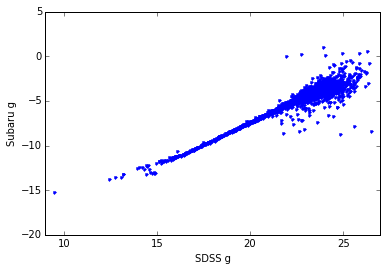

In [15]:
fig = plt.figure()
plt.plot(cat['g'],cat['MAG_AUTO_g'],'.')
plt.xlim((9,27))
plt.ylim((-20,5))
plt.xlabel('SDSS g')
plt.ylabel('Subaru g')

There isn't significant curvature so it should be fine to fit a line to estimate the zero point. The curvature that there is at the bright end can be explained by saturation of the deeper Subaru data. I suggest using the data between:

* 17 < g_sdss < 22
* and -15 < g_subaru < 0

In [62]:
g_sdss_min = 17
g_sdss_max = 22
g_sub_min = -15
g_sub_max = 0

mask_g = np.logical_and(np.logical_and(cat['g'] > g_sdss_min, cat['g'] < g_sdss_max),
                        np.logical_and(cat['MAG_AUTO_g'] > g_sub_min, cat['MAG_AUTO_g'] < g_sub_max))

In [26]:
slope_g, intercept_g, r_g, p_g, stderr_g = linregress(np.array(cat['g'][mask_g]),np.array(cat['MAG_AUTO_g'][mask_g]))

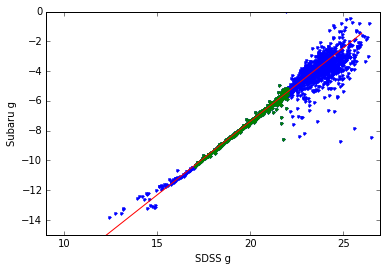

In [30]:
fig = plt.figure()
plt.plot(cat['g'],cat['MAG_AUTO_g'],'.')
plt.plot(cat['g'][mask_g],cat['MAG_AUTO_g'][mask_g],'.')
x_lim = plt.xlim((9,27))
plt.ylim((-15,0))
# plot the fit line
x = np.arange(x_lim[0],x_lim[1])
plt.plot(x, slope_g*x + intercept_g)
plt.xlabel('SDSS g')
plt.ylabel('Subaru g')

# r-band zero point

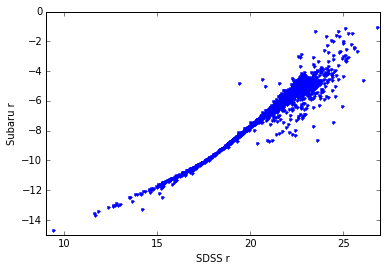

In [33]:
fig = plt.figure()
plt.plot(cat['r'],cat['MAG_AUTO_r'],'.')
plt.xlim((9,27))
plt.ylim((-15,0))
plt.xlabel('SDSS r')
plt.ylabel('Subaru r')

In [35]:
r_sdss_min = 18
r_sdss_max = 22
r_sub_min = -15
r_sub_max = 0

mask_r = np.logical_and(np.logical_and(cat['r'] > r_sdss_min, cat['r'] < r_sdss_max),
                        np.logical_and(cat['MAG_AUTO_r'] > r_sub_min, cat['MAG_AUTO_r'] < r_sub_max))

In [36]:
slope_r, intercept_r, r_r, p_r, stderr_r = linregress(np.array(cat['r'][mask_r]),np.array(cat['MAG_AUTO_r'][mask_r]))

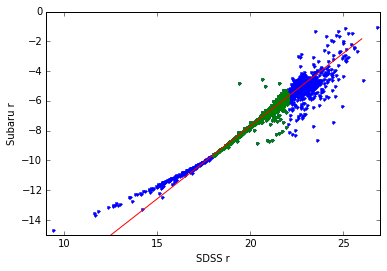

In [37]:
fig = plt.figure()
plt.plot(cat['r'],cat['MAG_AUTO_r'],'.')
plt.plot(cat['r'][mask_r],cat['MAG_AUTO_r'][mask_r],'.')
x_lim = plt.xlim((9,27))
plt.ylim((-15,0))
# plot the fit line
x = np.arange(x_lim[0],x_lim[1])
plt.plot(x, slope_r*x + intercept_r)
plt.xlabel('SDSS r')
plt.ylabel('Subaru r')

# i-band zero point

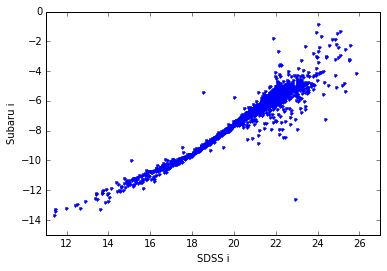

In [40]:
fig = plt.figure()
plt.plot(cat['i'],cat['MAG_AUTO_i'],'.')
plt.xlim((11,27))
plt.ylim((-15,0))
plt.xlabel('SDSS i')
plt.ylabel('Subaru i')

In [41]:
i_sdss_min = 18
i_sdss_max = 22
i_sub_min = -15
i_sub_max = 0

mask_i = np.logical_and(np.logical_and(cat['i'] > i_sdss_min, cat['i'] < i_sdss_max),
                        np.logical_and(cat['MAG_AUTO_i'] > r_sub_min, cat['MAG_AUTO_i'] < i_sub_max))

In [42]:
slope_i, intercept_i, r_i, p_i, stderr_i = linregress(np.array(cat['i'][mask_i]),np.array(cat['MAG_AUTO_i'][mask_i]))

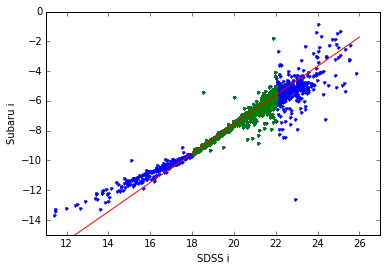

In [44]:
fig = plt.figure()
plt.plot(cat['i'],cat['MAG_AUTO_i'],'.')
plt.plot(cat['i'][mask_i],cat['MAG_AUTO_i'][mask_i],'.')
x_lim = plt.xlim((11,27))
plt.ylim((-15,0))
# plot the fit line
x = np.arange(x_lim[0],x_lim[1])
plt.plot(x, slope_i*x + intercept_i)
plt.xlabel('SDSS i')
plt.ylabel('Subaru i')

# Zero points based on linear regression

In [46]:
print 'g = {0:0.3f}'.format(-intercept_g)
print 'r = {0:0.3f}'.format(-intercept_r)
print 'i = {0:0.3f}'.format(-intercept_i)

g = 27.131
r = 27.241
i = 27.138


# Zero points based on differeincing
## G

In [67]:
mean_dif_g = np.mean(np.array(cat['g'][mask_g])-np.array(cat['MAG_AUTO_g'][mask_g]))
median_dif_g = np.median(np.array(cat['g'][mask_g])-np.array(cat['MAG_AUTO_g'][mask_g]))
print 'g zero point based on median = {0:0.3f}'.format(median_dif_g)
print 'g zero point based on mean = {0:0.3f}'.format(mean_dif_g)

g zero point based on median = 27.368
g zero point based on mean = 27.384


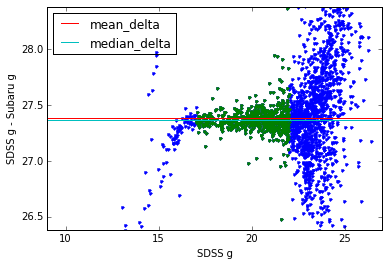

In [66]:
fig = plt.figure()
plt.plot(cat['g'],cat['g']-cat['MAG_AUTO_g'],'.')
plt.plot(cat['g'][mask_g],cat['g'][mask_g]-cat['MAG_AUTO_g'][mask_g],'.')
x_lim = plt.xlim((9,27))
plt.plot(x_lim,(mean_dif_g,mean_dif_g),label='mean_delta')
plt.plot(x_lim,(median_dif_g,median_dif_g),label='median_delta')
plt.ylim((mean_dif_g-1,mean_dif_g+1))
plt.xlabel('SDSS g')
plt.ylabel('SDSS g - Subaru g')
plt.legend(loc=0)

## r

In [68]:
mean_dif_r = np.mean(np.array(cat['r'][mask_r])-np.array(cat['MAG_AUTO_r'][mask_r]))
median_dif_r = np.median(np.array(cat['r'][mask_r])-np.array(cat['MAG_AUTO_r'][mask_r]))
print 'r zero point based on median = {0:0.3f}'.format(median_dif_r)
print 'r zero point based on mean = {0:0.3f}'.format(mean_dif_r)

r zero point based on median = 27.683
r zero point based on mean = 27.708


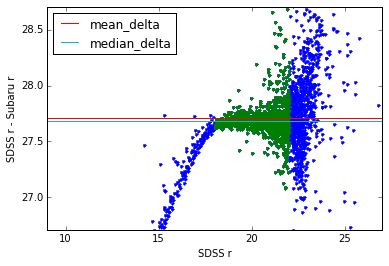

In [69]:
fig = plt.figure()
plt.plot(cat['r'],cat['r']-cat['MAG_AUTO_r'],'.')
plt.plot(cat['r'][mask_r],cat['r'][mask_r]-cat['MAG_AUTO_r'][mask_r],'.')
x_lim = plt.xlim((9,27))
plt.plot(x_lim,(mean_dif_r,mean_dif_r),label='mean_delta')
plt.plot(x_lim,(median_dif_r,median_dif_r),label='median_delta')
plt.ylim((mean_dif_r-1,mean_dif_r+1))
plt.xlabel('SDSS r')
plt.ylabel('SDSS r - Subaru r')
plt.legend(loc=0)

## i

In [70]:
mean_dif_i = np.mean(np.array(cat['i'][mask_i])-np.array(cat['MAG_AUTO_i'][mask_i]))
median_dif_i = np.median(np.array(cat['i'][mask_i])-np.array(cat['MAG_AUTO_i'][mask_i]))
print 'i zero point based on median = {0:0.3f}'.format(median_dif_i)
print 'i zero point based on mean = {0:0.3f}'.format(mean_dif_i)

i zero point based on median = 27.573
i zero point based on mean = 27.594


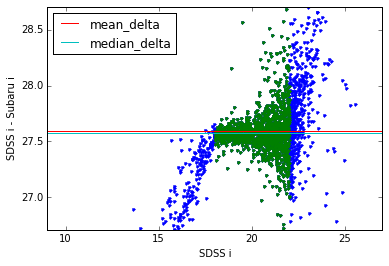

In [71]:
fig = plt.figure()
plt.plot(cat['i'],cat['i']-cat['MAG_AUTO_i'],'.')
plt.plot(cat['i'][mask_i],cat['i'][mask_i]-cat['MAG_AUTO_i'][mask_i],'.')
x_lim = plt.xlim((9,27))
plt.plot(x_lim,(mean_dif_i,mean_dif_i),label='mean_delta')
plt.plot(x_lim,(median_dif_i,median_dif_i),label='median_delta')
plt.ylim((mean_dif_r-1,mean_dif_r+1))
plt.xlabel('SDSS i')
plt.ylabel('SDSS i - Subaru i')
plt.legend(loc=0)

## Summary
Use the median zero point estimates rather than the regression estimates since it should be more robust and is a more direct measure.

In [76]:
print 'Results:'
print '---------'
print 'band    ZP'
print '----  ------'
print 'g     {0:0.3f}'.format(median_dif_g)
print 'r     {0:0.3f}'.format(median_dif_r)
print 'i     {0:0.3f}'.format(median_dif_i)

Results:
---------
band    ZP
----  ------
g     27.368
r     27.683
i     27.573


Note that these zero points are close to what Chris got for his observations a few nights later:

Results

Band | dmm | ZP
-----|-----|-----
 g   |0.008|27.358
 r   |0.005|27.685
 i   |0.008|27.555